<a href="https://colab.research.google.com/github/pymacbit/ML-Colab-Book/blob/master/Ensemble%20Methods/Boosting/XGBoost/Feature%20importance%20XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [2]:
!gdown --id 166bfO4TqdOGaxjaNO9dJSJAikjxH-2Rt --output train.csv

Downloading...
From: https://drive.google.com/uc?id=166bfO4TqdOGaxjaNO9dJSJAikjxH-2Rt
To: /content/train.csv
100% 60.3k/60.3k [00:00<00:00, 20.9MB/s]


In [3]:
#import the titanic data into a dataframe 
base_train_df = pd.read_csv('train.csv')

#reviewed data and select only continuous features
train_df = base_train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']]
train_df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [0]:
#Split data into training features and labels
X, y = train_df.loc[:, train_df.columns != 'Survived'], train_df['Survived']

from sklearn.model_selection import train_test_split
# split data into train and test sets
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [5]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.44%


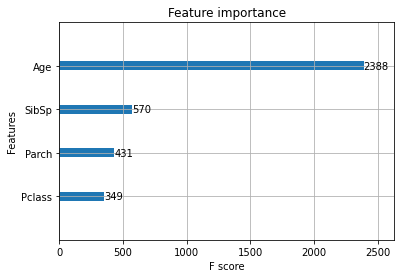

In [6]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.show()